In [55]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

log_reg = LogisticRegression(max_iter=5000)
dec_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('dec_tree', dec_tree), ('knn', knn)],
    voting='hard')

In [57]:
from sklearn.metrics import accuracy_score
for clf in (log_reg, dec_tree, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.872
KNeighborsClassifier 0.912
VotingClassifier 0.92


## BaggingClassifier

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [59]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.92


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)



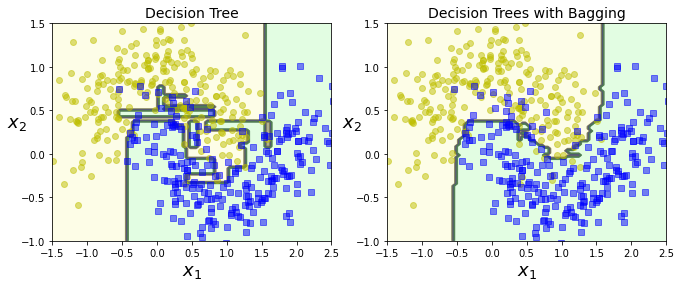

In [61]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_samples=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.92


In [81]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=100, n_estimators=500, random_state=1)

In [84]:
rf.feature_importances_

array([0.03553575, 0.01226494, 0.05019101, 0.04374695, 0.00727947,
       0.01080912, 0.06595881, 0.11920247, 0.00572747, 0.00579647,
       0.01464866, 0.00518273, 0.01443453, 0.04317789, 0.00519225,
       0.00489045, 0.00570694, 0.00352958, 0.00659486, 0.00519886,
       0.09513579, 0.0171599 , 0.10463376, 0.1057434 , 0.01160227,
       0.01475531, 0.04058644, 0.1268702 , 0.01265711, 0.00578659])

In [87]:
columns = list(X.columns)
importances = rf.feature_importances_
column_importance = list(zip(columns, importances))
column_importance.sort(key=lambda x: x[1], reverse=True)
column_importance

[('worst concave points', 0.1268702036276297),
 ('mean concave points', 0.11920246717602663),
 ('worst area', 0.10574339552849965),
 ('worst perimeter', 0.10463375697151374),
 ('worst radius', 0.0951357851164848),
 ('mean concavity', 0.06595881270466422),
 ('mean perimeter', 0.05019101014870338),
 ('mean area', 0.04374695078659959),
 ('area error', 0.04317789014079791),
 ('worst concavity', 0.040586440524106336),
 ('mean radius', 0.03553575355194392),
 ('worst texture', 0.017159901638564172),
 ('worst compactness', 0.014755308264803408),
 ('radius error', 0.01464866124544216),
 ('perimeter error', 0.014434532929347186),
 ('worst symmetry', 0.012657112427031943),
 ('mean texture', 0.012264936816120741),
 ('worst smoothness', 0.011602267469910587),
 ('mean compactness', 0.010809119076964982),
 ('mean smoothness', 0.0072794706039720596),
 ('symmetry error', 0.0065948647506455195),
 ('mean fractal dimension', 0.0057964747138209444),
 ('worst fractal dimension', 0.0057865922632524),
 ('mean